In [2]:
import gensim
# Need the interactive Tools for Matplotlib
import numpy as np
import matplotlib.pyplot as plt
# import ipympl
%matplotlib notebook
from sklearn.manifold import TSNE

In [3]:
model = gensim.models.KeyedVectors.load_word2vec_format('./dataset/GoogleNews-vectors-negative300.bin.gz', binary=True)

In [89]:
plt.rcParams['figure.figsize'] = (10, 10)

In [6]:
# Test the loaded word2vec model in gensim
# We will need the raw vector for a word
print(model['computer']) 

# We will also need to get the words closest to a word
model.similar_by_word('computer')

[ 1.07421875e-01 -2.01171875e-01  1.23046875e-01  2.11914062e-01
 -9.13085938e-02  2.16796875e-01 -1.31835938e-01  8.30078125e-02
  2.02148438e-01  4.78515625e-02  3.66210938e-02 -2.45361328e-02
  2.39257812e-02 -1.60156250e-01 -2.61230469e-02  9.71679688e-02
 -6.34765625e-02  1.84570312e-01  1.70898438e-01 -1.63085938e-01
 -1.09375000e-01  1.49414062e-01 -4.65393066e-04  9.61914062e-02
  1.68945312e-01  2.60925293e-03  8.93554688e-02  6.49414062e-02
  3.56445312e-02 -6.93359375e-02 -1.46484375e-01 -1.21093750e-01
 -2.27539062e-01  2.45361328e-02 -1.24511719e-01 -3.18359375e-01
 -2.20703125e-01  1.30859375e-01  3.66210938e-02 -3.63769531e-02
 -1.13281250e-01  1.95312500e-01  9.76562500e-02  1.26953125e-01
  6.59179688e-02  6.93359375e-02  1.02539062e-02  1.75781250e-01
 -1.68945312e-01  1.21307373e-03 -2.98828125e-01 -1.15234375e-01
  5.66406250e-02 -1.77734375e-01 -2.08984375e-01  1.76757812e-01
  2.38037109e-02 -2.57812500e-01 -4.46777344e-02  1.88476562e-01
  5.51757812e-02  5.02929

[('computers', 0.7979379296302795),
 ('laptop', 0.6640493273735046),
 ('laptop_computer', 0.6548868417739868),
 ('Computer', 0.6473334431648254),
 ('com_puter', 0.6082080006599426),
 ('technician_Leonard_Luchko', 0.5662748217582703),
 ('mainframes_minicomputers', 0.5617721080780029),
 ('laptop_computers', 0.5585449934005737),
 ('PC', 0.5539618134498596),
 ('maker_Dell_DELL.O', 0.5519253611564636)]

In [10]:
def display_closestwords_tsnescatterplot(model, word):
    
    arr = np.empty((0,300), dtype='f')
    word_labels = [word]

    # get close words
    close_words = model.similar_by_word(word)
    
    # add the vector for each of the closest words to the array
    arr = np.append(arr, np.array([model[word]]), axis=0)
    for wrd_score in close_words:
        wrd_vector = model[wrd_score[0]]
        word_labels.append(wrd_score[0])
        arr = np.append(arr, np.array([wrd_vector]), axis=0)
        
    # find tsne coords for 2 dimensions
    tsne = TSNE(n_components=2, random_state=0)
    np.set_printoptions(suppress=True)
    Y = tsne.fit_transform(arr)

    x_coords = Y[:, 0]
    y_coords = Y[:, 1]
    # display scatter plot
    plt.scatter(x_coords, y_coords)

    for label, x, y in zip(word_labels, x_coords, y_coords):
        plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
    plt.xlim(x_coords.min()+0.00005, x_coords.max()+0.00005)
    plt.ylim(y_coords.min()+0.00005, y_coords.max()+0.00005)
    plt.show()

In [16]:
def closestwords_tsne_distance(model, word):
    
    arr = np.empty((0,300), dtype='f')
    word_labels = [word]

    # get close words
    close_words = model.similar_by_word(word)
    
    # add the vector for each of the closest words to the array
    arr = np.append(arr, np.array([model[word]]), axis=0)
    for wrd_score in close_words:
        wrd_vector = model[wrd_score[0]]
        word_labels.append(wrd_score[0])
        arr = np.append(arr, np.array([wrd_vector]), axis=0)
        
    # find tsne coords for 2 dimensions
    tsne = TSNE(n_components=2, random_state=0)
    np.set_printoptions(suppress=True)
    Y = tsne.fit_transform(arr)

    x_coords = Y[:, 0]
    y_coords = Y[:, 1]
    # display scatter plot

    return x_coords, y_coords

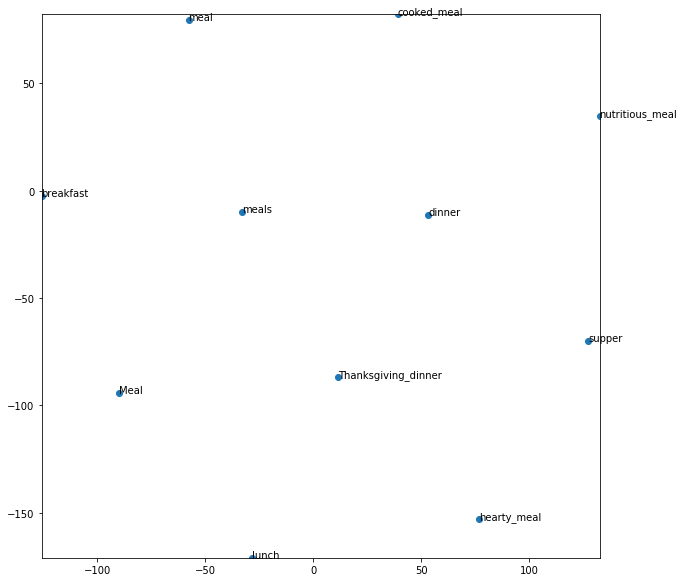

In [57]:
display_closestwords_tsnescatterplot(model, 'meal')

In [8]:
def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

In [34]:
X,Y = closestwords_tsne_distance(model,'meal')

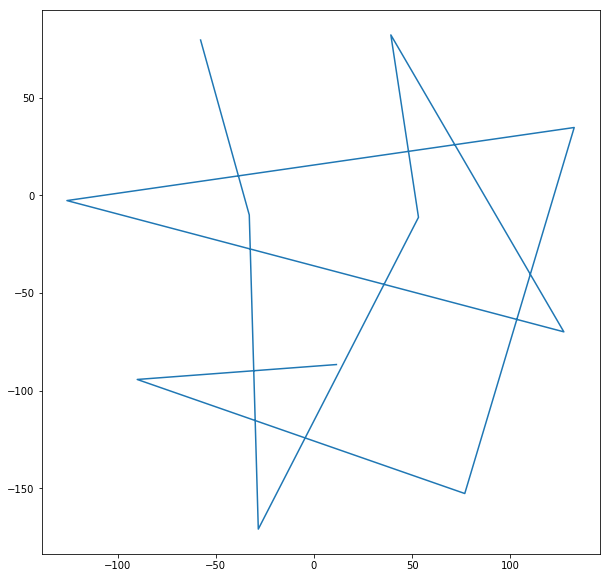

In [35]:
plt.plot(X,Y)

In [56]:
for i in range(len(X)):
    print(str(X[i])+ " " + str(Y[i]))

-57.763954 79.53495
-32.954346 -10.065233
-28.353235 -170.9819
53.27919 -11.285285
39.194878 82.1528
127.35514 -69.94204
-125.87404 -2.7089655
132.6405 34.723953
76.865685 -152.75853
-90.05059 -94.34025
11.4454975 -86.6981


In [80]:
from scipy.spatial import Delaunay

def sq_norm(v): #squared norm 
    return np.linalg.norm(v)**2

def circumcircle(points,simplex):
    A=[points[simplex[k]] for k in range(3)]
    M=[[1.0]*4]
    M+=[[sq_norm(A[k]), A[k][0], A[k][1], 1.0 ] for k in range(3)] 
    M=np.asarray(M, dtype=np.float32) 
    S=np.array([0.5*np.linalg.det(M[1:,[0,2,3]]), -0.5*np.linalg.det(M[1:,[0,1,3]])]) 
    a=np.linalg.det(M[1:, 1:]) 
    b=np.linalg.det(M[1:, [0,1,2]]) 
    return S/a,  np.sqrt(b/a+sq_norm(S)/a**2) #center=S/a, radius=np.sqrt(b/a+sq_norm(S)/a**2)

#pts=np.loadtxt('./dataset/data-ex-2d.txt')
#pts_food_tsne=np.loadtxt('./dataset/food_tsne.txt')
pts = np.loadtxt('./dataset/food_tsne.txt')
tri = Delaunay(pts)

colors=['#C0223B', '#404ca0', 'rgba(173,216,230, 0.5)']# colors for vertices, edges and 2-simplexes

def make_trace(x, y,  point_color=colors[0], line_color=colors[1]):# define the trace
                                                                   #for an alpha complex
    return Scatter(mode='markers+lines', #set vertices and 
                                         #edges of the alpha-complex
                   name='',
                   x=x,
                   y=y,
                   marker=Marker(size=6.5, color=point_color),
                   line=Line(width=1.25, color=line_color),
                   
                  )

def make_XAxis(axis_style):
    return XAxis(axis_style)
    
def make_YAxis(axis_style):
    return YAxis(axis_style) 


pl_width=800
pl_height=460
title = 'Delaunay triangulation and Alpha Complex/Shape for a Set of 2D Points'

axis_style = dict(showline=True, 
                  mirror=True,
                  zeroline=False,
                  showgrid=False,
                  showticklabels=True,
                  range=[-0.1,1.1],
                  tickvals=[0, 0.2, 0.4, 0.6, 0.8, 1.0],
                  ticklen=5
                 )

for s in range(1,3):   
    figure['layout'].update({'xaxis{}'.format(s): make_XAxis(axis_style)})# set xaxis style
    figure['layout'].update({'yaxis{}'.format(s): make_YAxis(axis_style)})# set yaxis style

X,Y=Plotly_data(pts, tri.simplices)# get data for Delaunay triangulation
figure.append_trace(make_trace(X, Y), 1, 1) 

In [81]:
def display_closestwords_tsnescatterplot(model, word):
    
    arr = np.empty((0,300), dtype='f')
    word_labels = [word]

    # get close words
    close_words = model.similar_by_word(word)
    
    # add the vector for each of the closest words to the array
    arr = np.append(arr, np.array([model[word]]), axis=0)
    for wrd_score in close_words:
        wrd_vector = model[wrd_score[0]]
        word_labels.append(wrd_score[0])
        arr = np.append(arr, np.array([wrd_vector]), axis=0)
        
    # find tsne coords for 2 dimensions
    tsne = TSNE(n_components=2, random_state=0)
    np.set_printoptions(suppress=True)
    Y = tsne.fit_transform(arr)

    x_coords = Y[:, 0]
    y_coords = Y[:, 1]
    
    for label, x, y in zip(word_labels, x_coords, y_coords):
        plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
#plt.plot(X,Y)

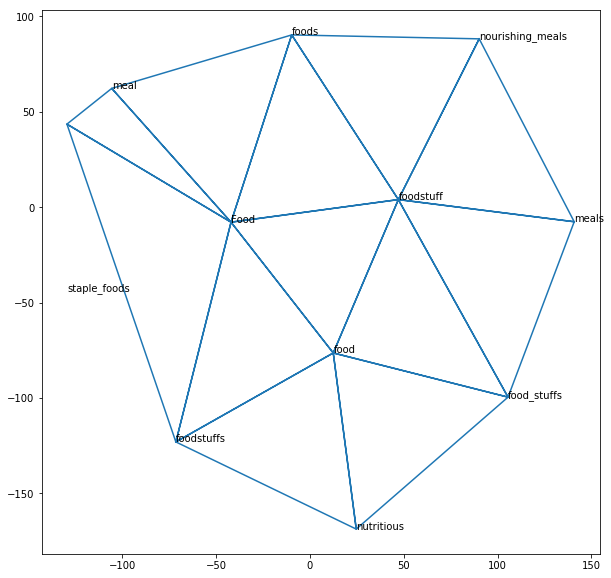

In [90]:
display_closestwords_tsnescatterplot(model,'food')
plt.plot(X,Y)